In [1]:
import importlib
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import numpy as np

from CASutils import mapplot_utils as maps
from CASutils import colorbar_utils as cbars
from CASutils import plotposition_utils as pos

importlib.reload(maps)
importlib.reload(cbars)
importlib.reload(pos)

<module 'CASutils.plotposition_utils' from '/home/islas/python/CASanalysis/CASutils/plotposition_utils.py'>

In [2]:
plotdir="/project/cas/islas/python_plots/snowpaper/FIGURES/"

In [3]:
filepath="/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/"

In [4]:
both_1 = xr.open_mfdataset(filepath+"TVAR_Isla_CAM6_CLM5.nc")
both_2 = xr.open_mfdataset(filepath+"TVAR_Isla_CAM6_CLM5_002.nc")
both_3 = xr.open_mfdataset(filepath+"TVAR_Cecile_CAM6_CLM5.nc")
cam6_clm5 = (both_1 + both_2 + both_3)/3.

In [5]:
x1, x2, y1, y2 = pos.get3by3coords()

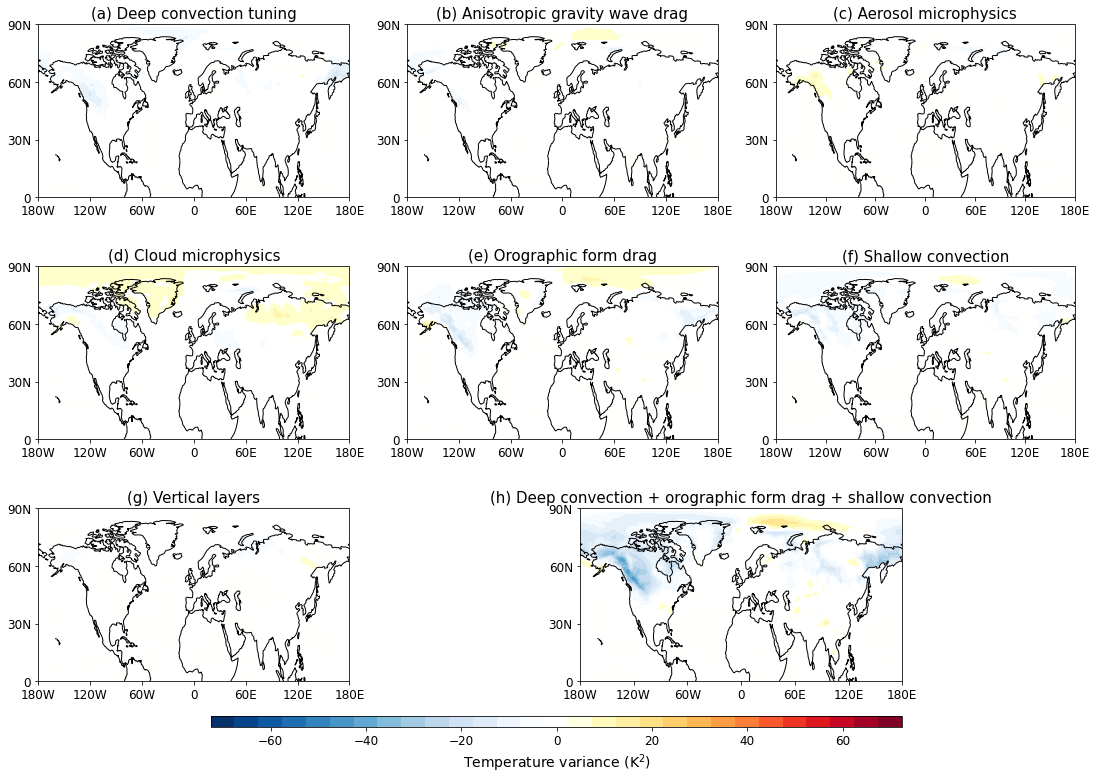

In [6]:
expname=['cam5_zmconv.001','iogw.001','mam3.001','mg1.002','tms.001','uw.003','L30.001']
titlename=['Deep convection tuning','Anisotropic gravity wave drag','Aerosol microphysics','Cloud microphysics',
           'Orographic form drag','Shallow convection','Vertical layers']

fig = plt.figure(figsize=(16,16))

title=['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)']

for i in range(0,len(expname),1):
    dat = xr.open_dataset(filepath+"TVAR_"+expname[i]+".nc")
    
    ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, cam6_clm5.djfvar - dat.djfvar, cam6_clm5.lon, cam6_clm5.lat,
                                                5,-70,70,title[i]+' '+titlename[i],x1[i],x2[i],y1[i],y2[i], fontsize=15)

    
expname=['cam5_zmconv.001','tms.001','uw.003']
datsum = np.zeros([dat.lat.size, dat.lon.size])
for i in range(0,len(expname),1):
    dat = xr.open_dataset(filepath+"TVAR_"+expname[i]+".nc")
    datsum[:] = datsum[:] + (cam6_clm5.djfvar - dat.djfvar)
    
ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, datsum, cam6_clm5.lon, cam6_clm5.lat,
                                               5,-70,70,'(h) Deep convection + orographic form drag + shallow convection',
                                               0.37+0.15, 0.37+0.16+x2[0]-x1[0], y1[7], y2[7], fontsize=15)

ax = cbars.plotcolorbar(fig, 5, -70, 70, 'Temperature variance (K$^{2}$)', 0.2,0.8,y1[7]-0.04,y1[7]-0.03,ticks=([-60,-40,-20,0,20,40,60]), fsize=12)

fig.savefig(plotdir+"figS3.pdf", facecolor='white', bbox_inches='tight')